In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

font = {'size': 16}
plt.rc('font', **font)

In [18]:
def f(x):
    return np.sin(x)

def ccn_model(eta_star, alpha, beta):
    return (1 - beta - alpha)*eta_star + alpha


def eta(x, environment):
    if environment=='sinusoid':
        return .5 + .5 * np.sin(2.9*x + .1)

    elif environment=='piecewise_sinusoid':
        return np.piecewise(x,[
            ((-1 <= x) & (x <= -.61)),
            ((-.61 < x) & (x <= 0.921)),
            ((0.921 < x) & (x <= 1))],  
            [lambda v: .4+.4*np.cos(9*v+5.5), 
            lambda v: .5+.3*np.sin(8*v+.9)+.15*np.sin(10*v+.2)+.05*np.sin(30*v+.2),
            lambda v: np.power(v, 3)])

    elif environment=='low_base_rate_sinusoid':
        return .5-.5 * np.sin(2.9*x+.1)

    else: 
        return np.piecewise(x,[
            ((-1 <= x) & (x <= -.5)),
            ((-.5 < x) & (x <= 0.2069)),
            ((0.2069 < x) & (x <= 0.8)),
            ((0.8 < x) & (x <= 1))],  
            [lambda v: -1.5*v-.75, 
             lambda v: 1.4*v+.7,
             lambda v: -1.5*v+1.3,
             lambda v: 1.25*v - .9 ])
    


In [26]:
np.random.uniform(-1,1)

alpha=0.2
beta=0

x = np.linspace(-1.2,1.2, 100000)
eta_star = eta(x, environment='low_base_rate_sinusoid')
eta_obs = ccn_model(eta_star, .2, .2)
eta_hat = -.5*x + .45
l_star = np.abs(eta_hat-eta_star)
l_obs = np.abs(eta_hat-eta_obs)




print('eta star', ((eta_star > .25) & (eta_star <= .75)).mean())
print('eta obs', ((eta_obs > .25) & (eta_obs <= .75)).mean())





eta star 0.39817
eta obs 0.66341


0.66341

In [4]:
# f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))
# # Class probability functions
# axs.plot(x, eta_star, label=f'$\eta^*_0(x)$', linewidth=2, color='black')
# axs.plot(x, eta_obs, label=f'$\eta_0(x)$', linewidth=2, color='black', linestyle='--')
# axs.plot(x, eta_hat, label=f'$\pi (x)$', color='blue', linestyle='-')
# plt.title('Risk under d=0')
# plt.xlabel('X')

# plt.xticks([-1, 0, 1])
# plt.legend(loc='upper right')
# plt.savefig('error parameter estimation intuition.png', dpi=400)

(array([18492.,  8154.,  6666.,  6573.,  8679.,  8679.,  9057.,  7053.,
         8156., 18491.]),
 array([2.13439322e-10, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

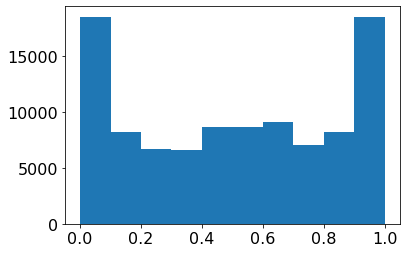

In [20]:

# Think about this stuff tomorrow - my intuition is that there is a way to get a symmetry check working
plt.hist(eta_star)



(array([18492.,  8154.,  6666.,  6573.,  8679.,  8679.,  9057.,  7053.,
         8156., 18491.]),
 array([0.2 , 0.26, 0.32, 0.38, 0.44, 0.5 , 0.56, 0.62, 0.68, 0.74, 0.8 ]),
 <BarContainer object of 10 artists>)

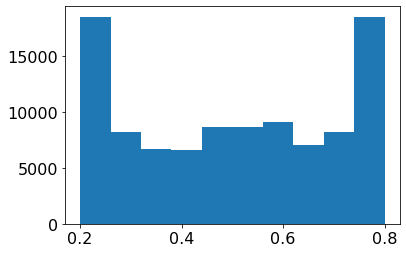

In [27]:
plt.hist(eta_obs)

In [31]:
x = np.linspace(0, 1)

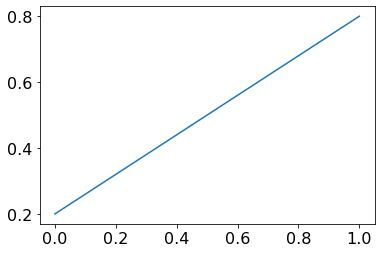

In [81]:


pi = .2
c = np.linspace(0, 1, num=500)
y = (1-c)*pi + c*(1-pi)


plt.plot(c, y)


In [82]:
dfdict = {
    'eta': y,
    'c': c
}

pd.DataFrame(dfdict).tail(n=50)


,eta,c
450,0.741082,0.901804
451,0.742285,0.903808
452,0.743487,0.905812
453,0.744689,0.907816
454,0.745892,0.909820
455,0.747094,0.911824
456,0.748297,0.913828
457,0.749499,0.915832
458,0.750701,0.917836
459,0.751904,0.919840


In [45]:
cutoff eta_obs at (1-c)

0.1988587399999997

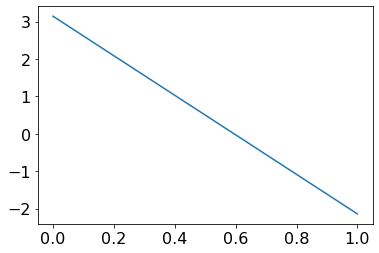

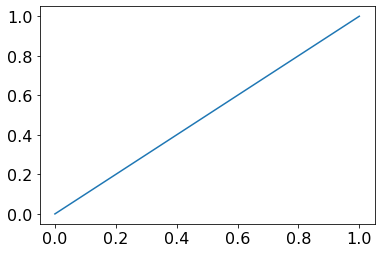

In [33]:
plt.plot(x, y)

Text(0, 0.5, '$\\eta(x)$')

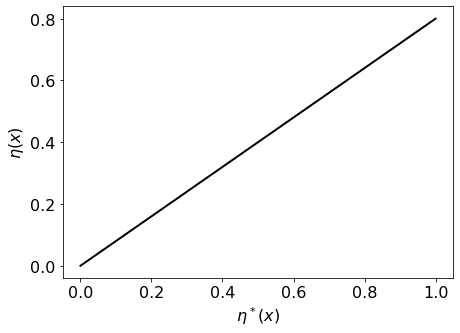

In [11]:



xinds = np.argsort(eta_star)

f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))

axs.plot(eta_star[xinds],eta_obs[xinds], linewidth=2, color='black')
plt.xlabel('$\eta^*(x)$')
plt.ylabel('$\eta(x)$')


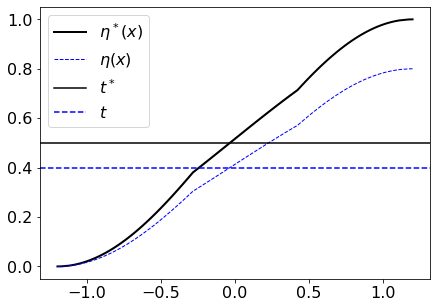

In [5]:
# np.argsort(eta_obs)[:10]



xinds = np.argsort(eta_star)

f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))
# Class probability functions
axs.plot(x, eta_star[xinds], label=f'$\eta^*(x)$', linewidth=2, color='black')
axs.plot(x, eta_obs[xinds], label=f'$\eta(x)$', linewidth=1, color='blue', linestyle='dashed')

axs.axhline(.5, color='black', label=r'$t^*$')

axs.axhline((1-alpha-beta)/2, color='blue', linestyle='dashed', label=r'$t$')

plt.legend()

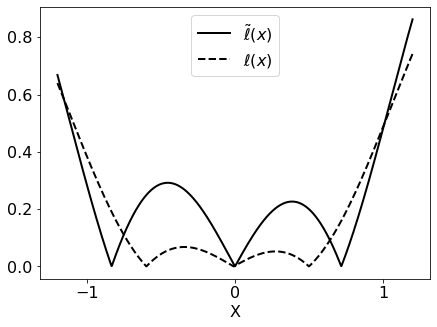

In [8]:
f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))

# Class probability functions
axs.plot(x, l_star, label=r'$\tilde{\ell}(x)$', linewidth=2, color='black')
axs.plot(x, l_obs, label=r'$\ell(x)$', linewidth=2, color='black', linestyle='--')

l_star_lpz = np.argmax(np.diff(l_star)/np.diff(x))
l_obs_lpz = np.argmax(np.diff(l_obs)/np.diff(x))
plt.xlabel('X')
plt.xticks([-1, 0, 1])
plt.legend()
plt.savefig('loss_funcs.png', dpi=400)



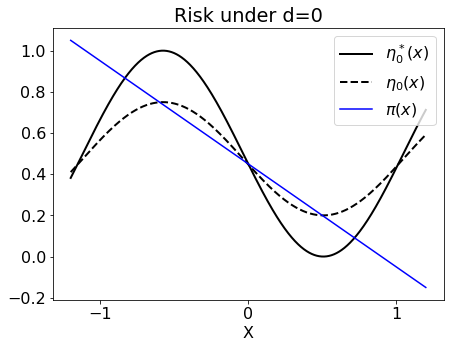

In [27]:
f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))




# Class probability functions
axs.plot(x, eta_star, label=f'$\eta^*_0(x)$', linewidth=2, color='black')
axs.plot(x, eta_obs, label=f'$\eta_0(x)$', linewidth=2, color='black', linestyle='--')
axs.plot(x, eta_hat, label=f'$\pi (x)$', color='blue', linestyle='-')
plt.title('Risk under d=0')
plt.xlabel('X')

plt.xticks([-1, 0, 1])
plt.legend(loc='upper right')
plt.savefig('error parameter estimation intuition.png', dpi=400)